In [3]:
import numpy as np
from numpy import zeros, sqrt, pi,exp,loadtxt, dot, arctan2, cross

import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.patches import Rectangle
from matplotlib.colors import  DivergingNorm
from mpl_toolkits.mplot3d import axes3d, Axes3D

import seaborn as sns

import pandas as pd


fsl = 50
font = {'weight' : 'medium',
        'size'   : 46}
matplotlib.rc('font', **font)
sns.set_context("poster")

In [4]:
df = pd.read_csv("summary.csv")
df = df[df.convolutionwidth >=2 ]
#df = df[df.convolutionwidth != 10000]
#df = df[df["convolutionwidth"]<1100]
df.describe()

,nx,quadraturetype,quadratureorder,convolutionmagnitude,convolutionwidth,rotationmagnitude,testcaseid,runtime,absL1,relL1,...,relL2,L1R1,L2R1,TVR1,L1R2,L2R2,TVR2,L1R3,L2R3,TVR3
count,288.0,288.0,288.0,288.000000,288.000000,288.0,288.0,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,0.0
mean,50.0,3.0,2.0,7.611111,8.031250,0.0,1.0,11.578749,1.042695,7.675201,...,410.151923,13.038138,0.337002,79.584658,2.686351,1.485844,210.162921,6.957333,3.988423,NaN
std,0.0,0.0,0.0,6.087757,5.340405,0.0,0.0,5.353854,0.482128,3.502011,...,459.538279,14.479568,0.217892,64.885544,2.019881,1.331098,44.833980,1.129571,4.199089,NaN
min,50.0,3.0,2.0,0.000000,2.000000,0.0,1.0,5.582664,0.502733,3.195367,...,20.020146,0.807282,0.014535,1.265198,0.051133,0.016800,141.645761,5.244947,0.000034,NaN
25%,50.0,3.0,2.0,2.000000,3.875000,0.0,1.0,7.568566,0.681568,4.956768,...,59.327373,2.024942,0.106742,38.932554,1.328429,0.091993,173.327291,5.979307,0.079902,NaN
50%,50.0,3.0,2.0,6.500000,6.500000,0.0,1.0,10.849892,0.977059,7.338093,...,203.769826,6.467947,0.342000,57.298827,2.109832,1.120153,201.886231,6.489067,1.944170,NaN
75%,50.0,3.0,2.0,12.000000,10.500000,0.0,1.0,12.274908,1.105385,8.464065,...,653.043175,20.651123,0.569068,90.284627,3.243450,2.889047,261.401953,8.266371,7.995947,NaN
max,50.0,3.0,2.0,20.000000,20.000000,0.0,1.0,31.895349,2.872254,20.496235,...,1895.648401,59.946004,0.596693,303.487968,9.597893,3.349875,263.805683,8.342269,10.700661,NaN


0.3775215696335543
2.4215593388531453
1.0


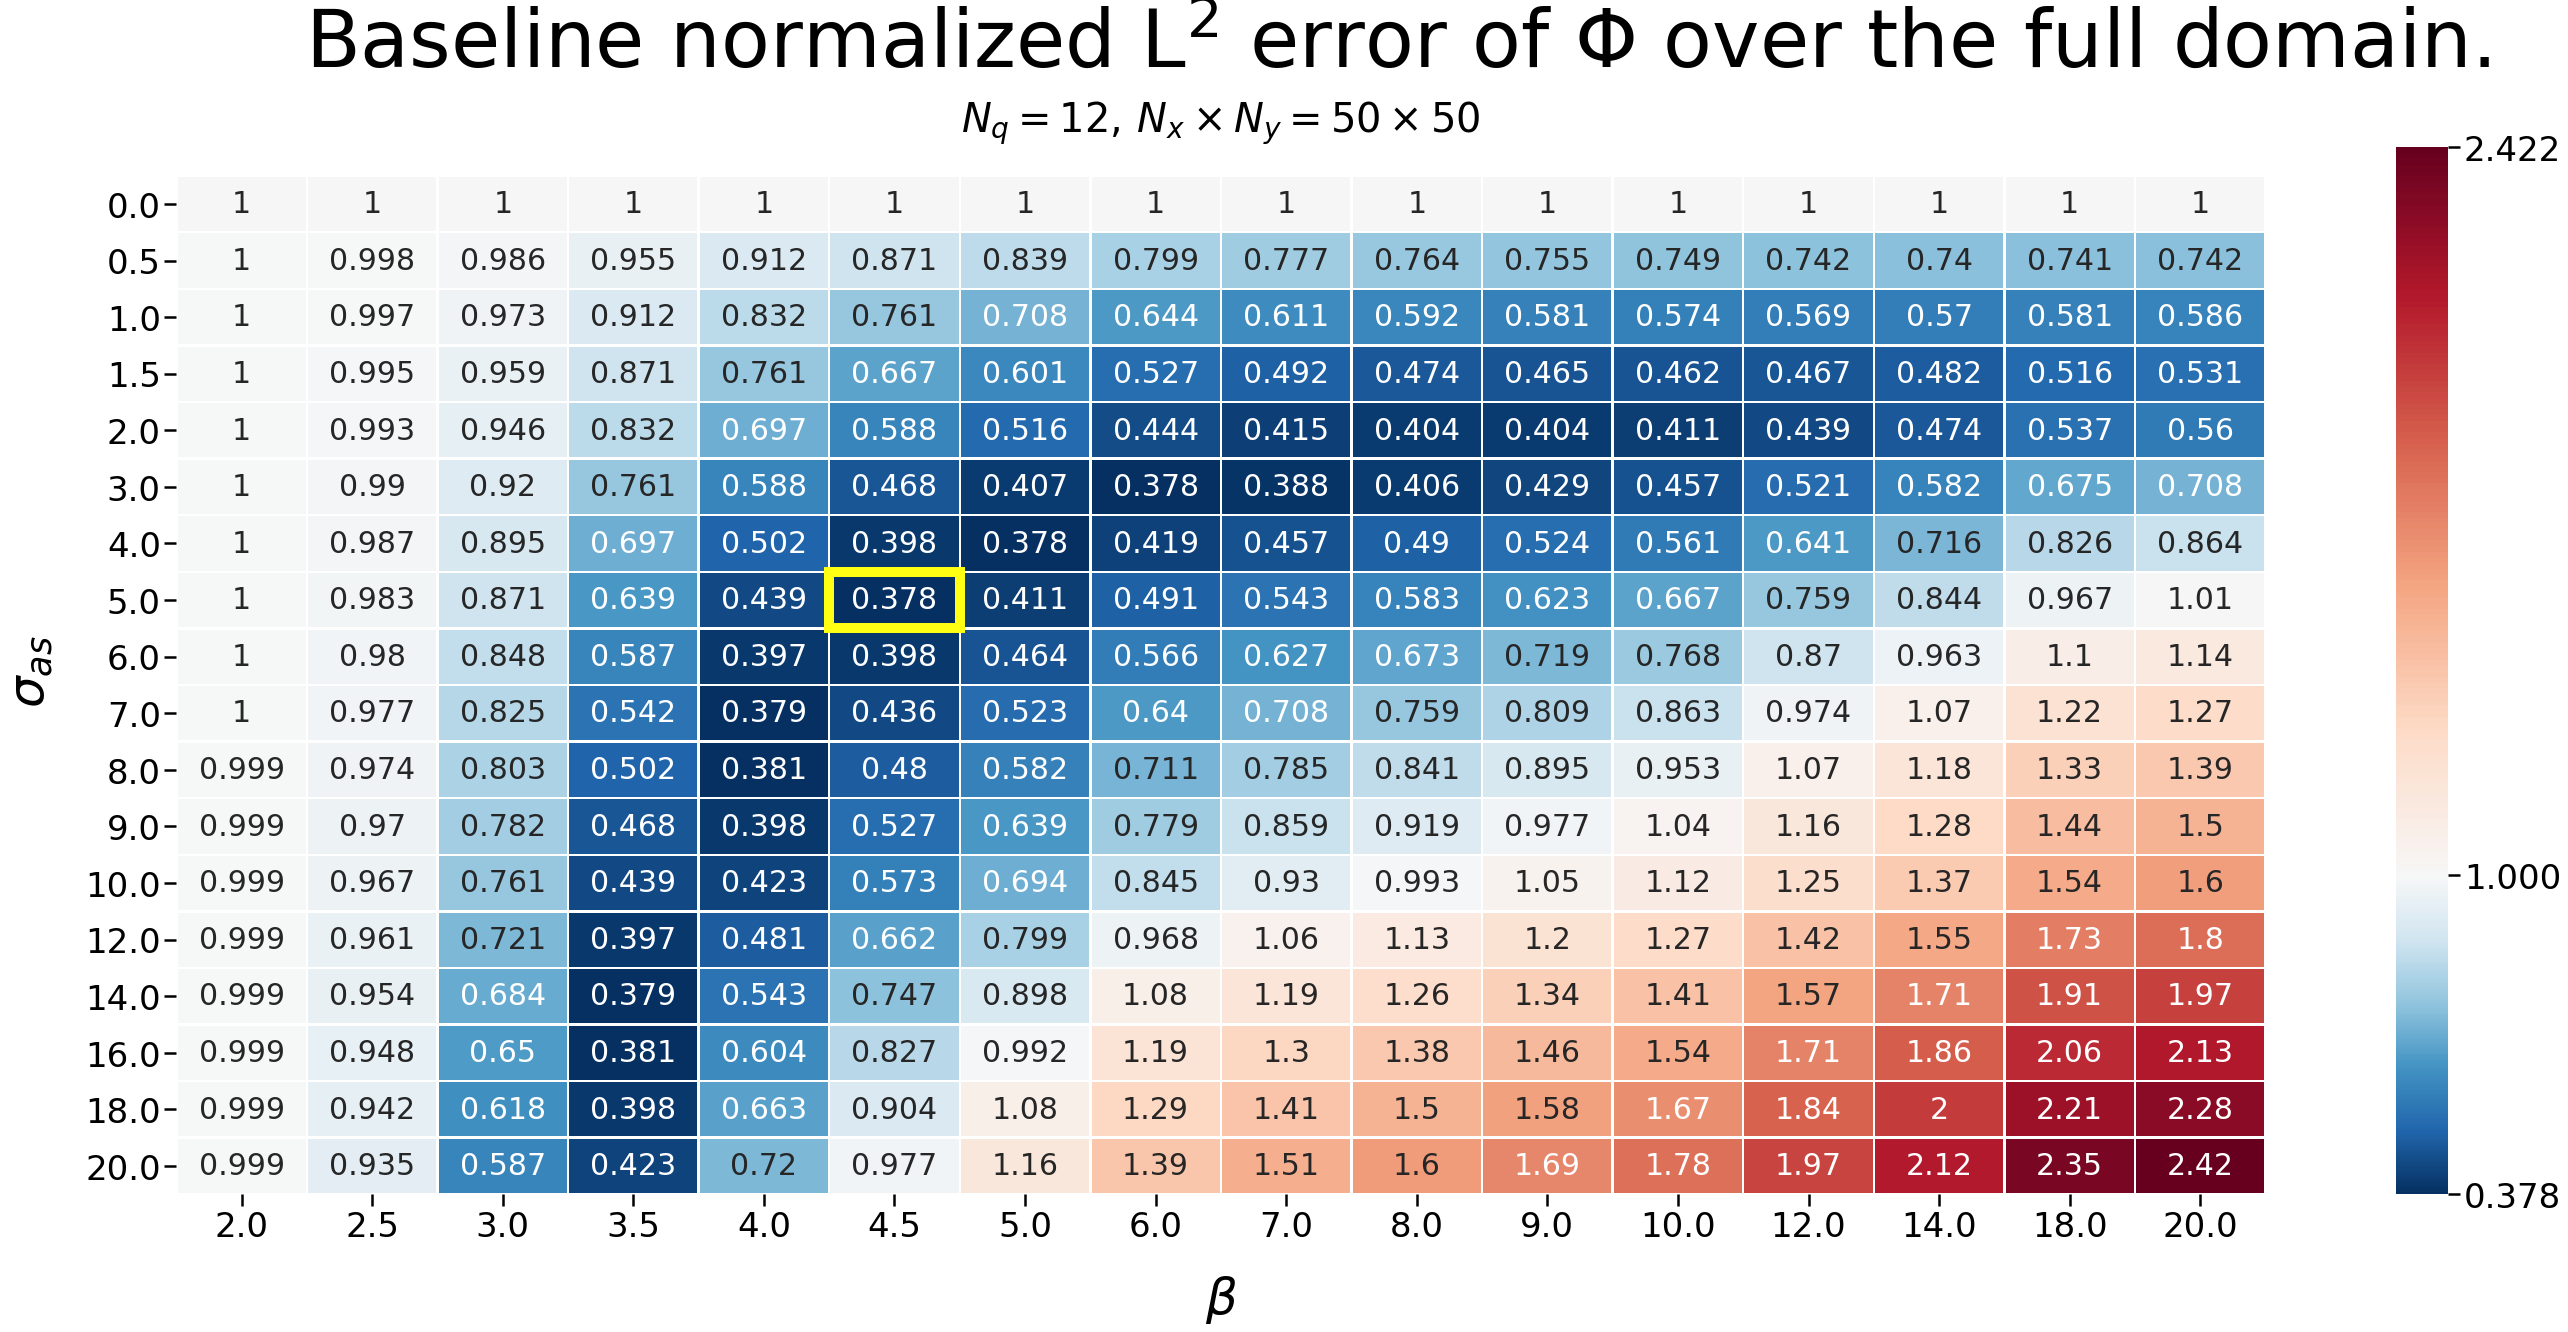

In [7]:
normalized = True
nq = [12]
r = [0.2,0.6,0.9]
fsl = 40
df["convolutionwidthcorrect"] = np.round(df["convolutionwidth"] ,3)
for nattr,attr in enumerate(["absL2"]):

    for inx,nx,i,order in zip([0],[50],[0],[2]):
            fig,ax = plt.subplots(1,1,figsize=(40,20))
            matplotlib.rc('font', **font)
    
    #for inx,nx in enumerate([50,100,200]):
    #    for i,order in enumerate([2,3,4]):
    #        ax = axs[inx,i]
            
            dftmp = df[df["quadratureorder"]==order]
            dftmp = dftmp[dftmp["nx"]==nx] 
            piv = dftmp.pivot(index="convolutionmagnitude",columns="convolutionwidthcorrect",values=attr)
            if normalized: # divide all errors by the base line error, i.e. no AS
                piv = piv.div(piv.values[0,:])
            #piv = np.log10(piv)
            cmap = sns.color_palette("RdBu_r", 20001)
            vmin = piv.values.min()
            vmax = piv.values.max()
            vcenter = np.min(piv.values[0,:])
            if vmax == vcenter: # we don't need a diverging colormap because all values are smaller than baseline
                vcenter = (vmax+vmin)/2
                cmap = "Blues_r"
            if vmin==vcenter:
                vcenter= (vmax+vmin)/2
                cmap = "Reds"
            print(vmin)
            print(vmax)
            print(vcenter)
            divnorm = DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
            sns.heatmap(piv,annot=True,  linewidths=1.5, ax=ax, fmt=".3g",cmap=cmap,norm=divnorm,
                    cbar_kws={"ticks":[vmin,vcenter,vmax]},annot_kws={"fontsize":30})
            
            # set axis style
            ax.set_title(r"$N_q={},\, N_x \times N_y={}\times{}$".format(nq[i],nx,nx),fontdict={'fontsize': fsl, 'fontweight': 'medium'},pad = 10)
            ax.set_ylim(18, -0.5)
            ax.set_xlabel(r"$\beta$", fontdict={'fontsize': 50, 'fontweight': 'medium'},labelpad = 30)
            ax.set_ylabel(r"$\sigma_{as}$",fontdict={'fontsize': 50, 'fontweight': 'medium'},labelpad = 30)
            
            plt.xticks(fontsize=34)
            plt.yticks(fontsize=34,rotation=0)
            cax = plt.gcf().axes[-1]
            cax.tick_params(labelsize=34)
            # find the best element and circle it in yellow 
            pivu = piv.unstack()
            minwidth,minstr = pivu.idxmin()
            for posj,j in enumerate(np.sort(np.unique(df["convolutionwidth"]))):
                for posk,k in enumerate(np.sort(np.unique(df["convolutionmagnitude"]))):
                    if minwidth==j and minstr == k:
                        #print("{},{},{},{}".format(posj,j,posk,k))
                        ax.add_patch(Rectangle((posj,posk), 1, 1, fill=False, edgecolor='xkcd:yellow', lw=10))
            firstword = "Baseline normalized" if normalized else "Absolute"
            if nattr==0:
                plt.suptitle(r"{} L$^2$ error of $\Phi$ over the full domain.".format(firstword),fontsize=2*fsl )
            else:
                plt.suptitle(r"{} L$^2$ error of $\rho$ along circle of radius $r={}$".format(firstword,r[nattr-1]),fontsize=2*fsl)
            fig.tight_layout(rect=[0, 0.03, 1, 0.95])
            if normalized:
                plt.savefig("{}_{}_ictt_heatmap_{}_normalized.png".format(nx,order,attr))
            else:
                plt.savefig("{}_{}_ictt_heatmap_{}.png".format(nx,order,attr))